<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

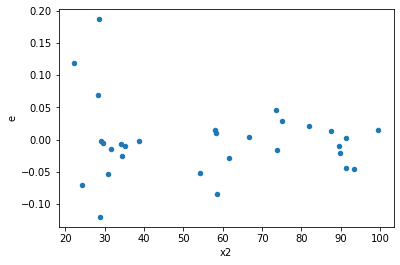

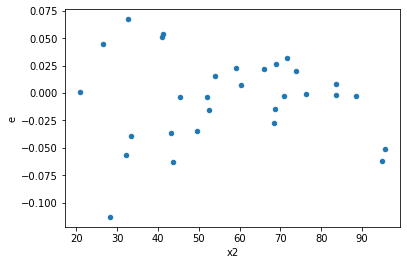

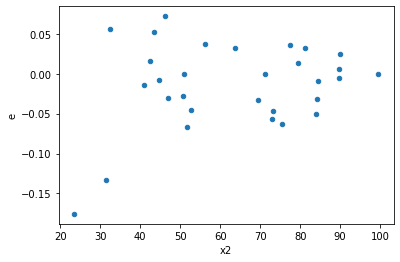

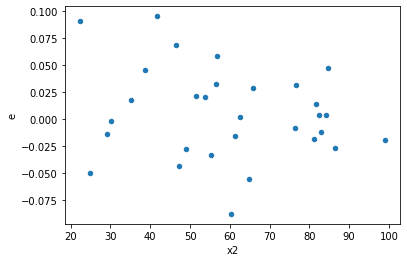

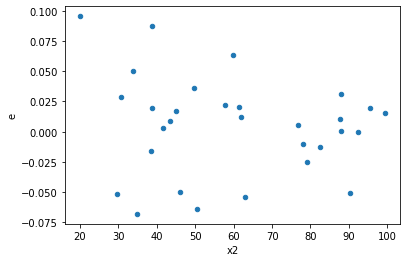

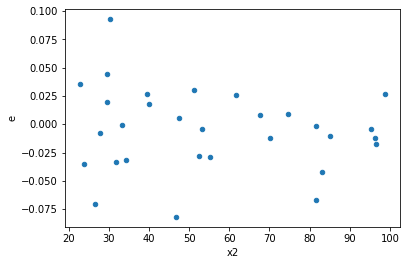

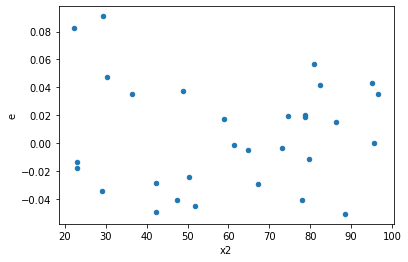

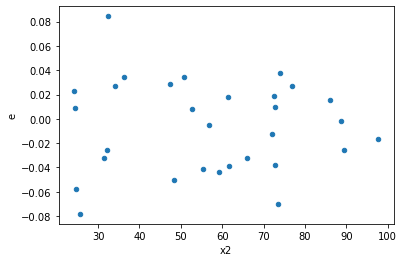

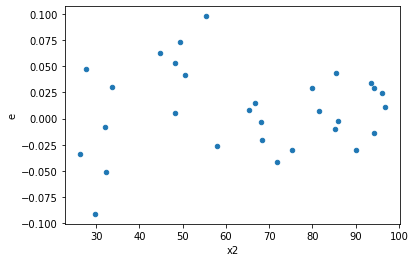

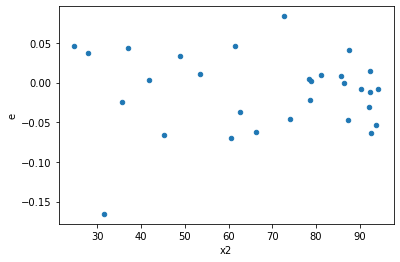

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,9.0,0.014799247121176935,0.021360778693737884,0.0016443607912418816,0.002373419854859765,1.4433692821556947,0.5933605647054467,0.7033197176472766,0.29668028235272337,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.013949451149630686,0.01609464537109662,0.0015499390166256318,0.0017882939301218466,1.153783414017886,0.8347472883283693,0.5826263558358153,0.41737364416418465,Reject001=1 : Homoscedasticity
16.0,9.0,9.0,0.008468457947523324,0.010350002259472647,0.000940939771947036,0.0011500002510525164,1.2221826362731834,0.7699110371312794,0.6150444814343603,0.3849555185656397,Reject001=1 : Homoscedasticity
20.0,9.0,9.0,0.007328137753841614,0.017575703520526804,0.0008142375282046238,0.0019528559467252005,2.3983860717292234,0.2086205707874096,0.8956897146062952,0.1043102853937048,Reject001=1 : Homoscedasticity
21.0,9.0,9.0,0.002598816781112296,0.0381483104844032,0.0002887574201235884,0.004238701164933689,14.679107339023604,0.0004590260350620934,0.999770486982469,0.0002295130175310467,Reject001=0 : Heteroscedasticity
25.0,9.0,9.0,0.010947620750026945,0.0245147977357149,0.0012164023055585495,0.002723866415079433,2.23928087165922,0.24554033502385453,0.8772298324880727,0.12277016751192726,Reject001=1 : Homoscedasticity
27.0,9.0,9.0,0.0028017824144434943,0.014124936159609396,0.0003113091571603883,0.0015694373510677106,5.041410812914595,0.024397559100457267,0.9878012204497714,0.012198779550228633,Reject001=1 : Homoscedasticity
36.0,9.0,9.0,0.00745379377345035,0.008107006415540598,0.00082819930816115,0.000900778490615622,1.087634922825062,0.9024668792564468,0.5487665603717766,0.4512334396282234,Reject001=1 : Homoscedasticity
43.0,9.0,9.0,0.014979108667635875,0.01699953313062616,0.0016643454075150972,0.0018888370145140178,1.1348828229917078,0.8535857097960307,0.5732071451019847,0.42679285489801533,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.03426750587627801,0.010878835860881758,0.003807500652919779,0.001208759540097973,0.3174679797286539,0.10258381211468985,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.01836721268619033,0.009672021455338693,0.0020408014095767034,0.0010746690505931882,0.5265916838111615,0.353364158821913,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.04330400005280711,0.005042860955596114,0.004811555561423012,0.0005603178839551238,0.11645254363214928,0.0037103623293654056,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,0.018014594339123856,0.010958260748595143,0.002001621593235984,0.0012175845276216825,0.6082990569927038,0.4704963753952302,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.014799247121176935,0.021360778693737884,0.0016443607912418816,0.002373419854859765,1.4433692821556947,0.5933605647054467,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.008869960587332226,0.005754484553684436,0.0009855511763702473,0.0006393871726316039,0.6487610059849414,0.5293978338334173,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.013949451149630686,0.01609464537109662,0.0015499390166256318,0.0017882939301218466,1.153783414017886,0.8347472883283693,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.012888342778992245,0.011572229868357124,0.0014320380865546938,0.0012858033187063472,0.897883464677836,0.8751517548163659,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.01685637995133361,0.00507746697870299,0.0018729311057037344,0.0005641629976336656,0.3012193005474631,0.08848813221346845,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      895
Reject001=0 : Heteroscedasticity    105
Name: Result_test, dtype: int64